In [1]:
from facenet_sandberg import Identifier, get_image_from_path_rgb, get_image_from_path_bgr, \
                            Detector, embedding_distance, DistanceMetric, get_images_from_dir
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.manifold import TSNE
import glob
import cv2

%matplotlib inline

### Get images

In [2]:
noam_chomsky_1 = get_image_from_path_rgb("noam-chomsky-1.jpg")
noam_chomsky_2 = get_image_from_path_rgb("noam-chomsky-2.jpg")
not_noam_chomsky = get_image_from_path_rgb("not-noam-chomsky.jpg")

In [3]:
def plot_images(image_1, image_2):
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image_1)
    f.add_subplot(1,2, 2)
    plt.imshow(image_2)

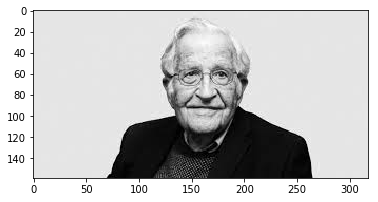

In [4]:
images = list(get_images_from_dir('people/noam_chomsky', recursive=False))
plt.imshow(images[3])

# Align

In [5]:
detector = Detector()

In [6]:
faces = detector.find_faces(noam_chomsky_1)

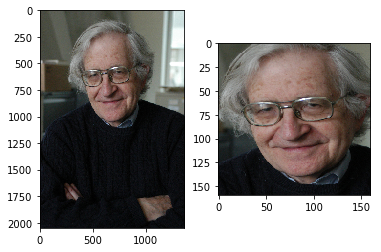

In [7]:
plot_images(noam_chomsky_1, faces[0].image)

### Bulk align

In [8]:
aligned_images = list(detector.bulk_find_face(images))

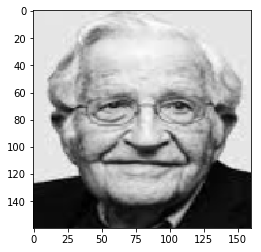

In [9]:
plt.imshow(aligned_images[3][0].image)

# Vectorize

In [10]:
identifier = Identifier(model_path=os.path.join('models','facenet_model.pb'))

### Get single face vectors

In [11]:
# vectorize() returns an array of vectors, one for each face in a single image (we grab the first because there is only one
# face in these images)
vector_1 = identifier.vectorize(noam_chomsky_1)[0]
vector_2 = identifier.vectorize(noam_chomsky_2)[0]
vector_3 = identifier.vectorize(not_noam_chomsky)[0]

### Visualize face encodings

In [12]:
noam_images = list(map(get_image_from_path_rgb, glob.glob("people/noam_chomsky/*.*")))
other_people = list(map(get_image_from_path_rgb, glob.glob("people/bernie/*.*")))

In [13]:
# We use the bulk encoding method vectorize_all() because it's much faster 
# Filter out empty arrays and grab the first item from each array of vectors per image 
noam_vectors = list(map(lambda x : x[0], filter(None, identifier.vectorize_all(noam_images, prealigned=False))))
other_vectors = list(map(lambda x : x[0], filter(None, identifier.vectorize_all(other_people, prealigned=False))))

Encoding:100% |##########################| Time:  0:00:06 Elapsed Time: 0:00:06
Encoding:100% |##########################| Time:  0:00:08 Elapsed Time: 0:00:08


In [17]:
# combine into one features array
features = np.array(noam_vectors + other_vectors)
# label each feature (0 is noam and 1 is not noam)
labels = np.array(([0] * len(noam_vectors)) + ([1] * len(other_vectors)) )

In [18]:
# use tsne to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0)
reduced = tsne.fit_transform(features)

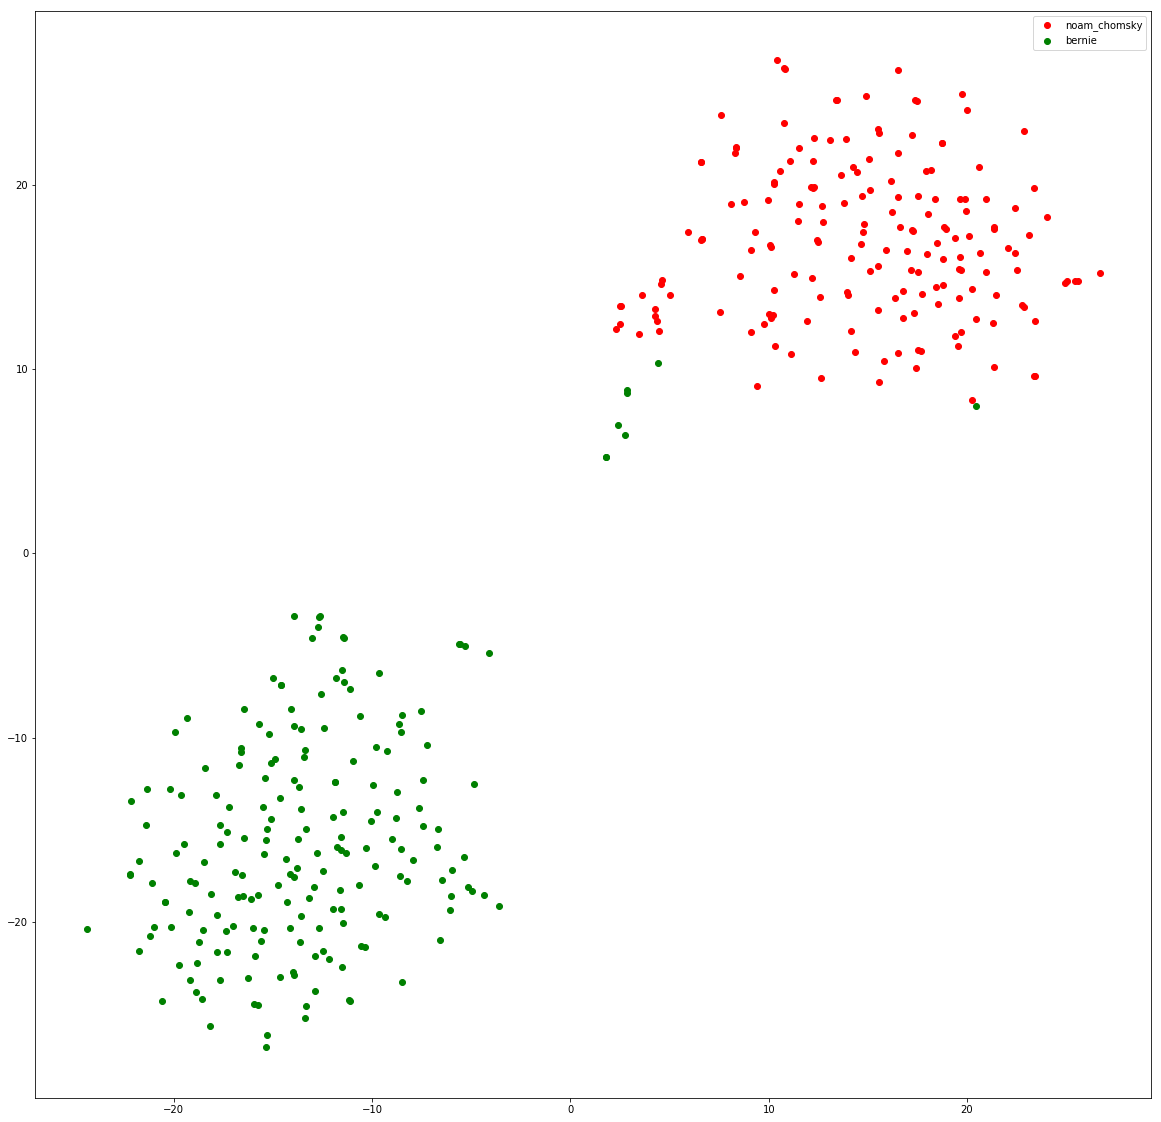

In [19]:
plt.figure(figsize=(20, 20))
colors = 'r', 'g',
for i, c, label in zip([0, 1], colors, ['noam_chomsky', 'bernie']):
    plt.scatter(reduced[labels == i, 0], reduced[labels == i, 1], c=c, label=label)
plt.legend()
plt.show()

# Compare two faces

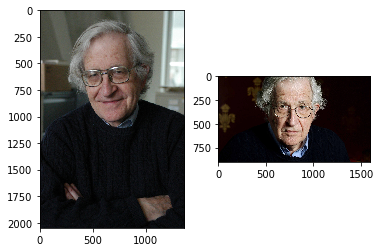

In [20]:
plot_images(noam_chomsky_1, noam_chomsky_2)

In [21]:
identifier.compare_images(noam_chomsky_1, noam_chomsky_2).is_match

True

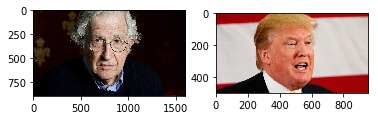

In [22]:
plot_images(noam_chomsky_2, not_noam_chomsky)

In [23]:
identifier.compare_images(noam_chomsky_2, not_noam_chomsky).is_match

False